# ChatGPT ile Borsa Fiyatlarını Tahmin Etme

In [1]:
import yfinance as yf

# Apple hisse senedi verilerini alın
apple = yf.Ticker("AAPL")
stock_data = apple.history(start="2022-01-01", end="2022-12-31")

# Verileri bir CSV dosyasına kaydedin
stock_data.to_csv("apple_stock_data.csv")

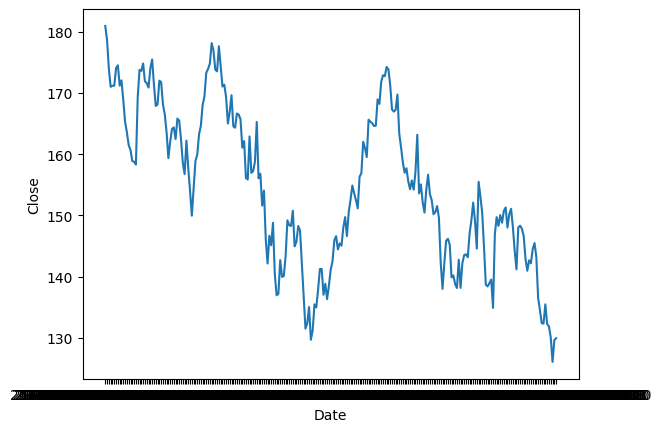

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stok verilerini bir pandas DataFrame'e yükleyin
import pandas as pd
stock_data = pd.read_csv("apple_stock_data.csv")

# Dizini tarih sütununa ayarlayın
stock_data.set_index("Date", inplace=True)

# Kapatma sütununu çizgi grafiği olarak çiz
sns.lineplot(data=stock_data, x=stock_data.index, y="Close")
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv("apple_stock_data.csv")

In [6]:
# Hedef olarak "Kapat" sütununu seçin
y = df["Close"]

# Özellikler olarak "Açık", "Yüksek", "Düşük" ve "Ses" sütunlarını seçin
X = df[["Open", "High", "Low", "Volume"]]

# Verileri bir eğitim seti (%80) ve bir test seti (%20) olarak ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Test verileri üzerinde tahminler yapın
predictions = model.predict(X_test)

# Öngörülen ve gerçek değerler arasındaki ortalama karesel hatayı hesaplayın
mse = mean_squared_error(y_test, predictions)

# Ortalama kare hatasını yazdır
print(f"Mean squared error: {mse:.2f}")

Mean squared error: 1.27
